In [ ]:
# IMPORTING ALL THE MODULES
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
from itertools import combinations
from collections import Counter

# **Data Wrangling, Cleaning and Feature Engineering**

In [ ]:
# FOR JUPYTER NOTEBOOK
# files = [file for file in os.listdir('/content/sales_data')] 
# files = 
# all_months_data = pd.DataFrame()

# for file in files:
#   df = pd.read_csv('/content/sales_data' + file)
#   all_months_data = pd.concat([all_months_data, df])
# all_months_data.to_csv('joined_data.csv',index=False)


In [ ]:
# FOR GOOGLE COLAB
# READING ALL THE DATASETS
april_sales = pd.read_csv('/content/sales_data/Sales_April_2019.csv')
august_sales = pd.read_csv('/content/sales_data/Sales_August_2019.csv')
december_sales = pd.read_csv('/content/sales_data/Sales_December_2019.csv')
february_sales = pd.read_csv('/content/sales_data/Sales_February_2019.csv')
january_sales = pd.read_csv('/content/sales_data/Sales_January_2019.csv')
july_sales = pd.read_csv('/content/sales_data/Sales_July_2019.csv')
june_sales = pd.read_csv('/content/sales_data/Sales_June_2019.csv')
march_sales = pd.read_csv('/content/sales_data/Sales_March_2019.csv')
may_sales = pd.read_csv('/content/sales_data/Sales_May_2019.csv')
november_sales = pd.read_csv('/content/sales_data/Sales_November_2019.csv')
october_sales = pd.read_csv('/content/sales_data/Sales_October_2019.csv')
september_sales = pd.read_csv('/content/sales_data/Sales_September_2019.csv')

In [ ]:
# JOINING ALL THE DATASETS
df = pd.concat([april_sales,august_sales,december_sales,february_sales,january_sales,july_sales,june_sales,march_sales,may_sales,november_sales,october_sales,september_sales])


In [ ]:
# CONVERTING ALL THE DATASETS INTO ONE CSV FILE
df.to_csv('joined_sales_data',index=False)

In [ ]:
# READING THE JOINED DATASET
all_data = pd.read_csv('joined_sales_data') 

In [ ]:
# TESTING DATASET
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# CHECKING THE NECESSARY INFORMATION LIKE DATA TYPES ETC.
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
# FINDING MISSING VALUES IN THE DATASET
missing_data = all_data[all_data.isna().any(axis=1)]

In [ ]:
# REMOVING ALL THE MISSING VALUES FROM THE ROWS
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
# FINDING MISSING VALUES FROM THE DATASET ROWS
all_data.isna().any(axis=1).sum()

0

In [ ]:
# REMOVING 'OR' FROM THE MONTH COLUMN
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [ ]:
# CREATING A NEW COLUMN BY THE NAME OF MONTH BY FEATURE ENGINEERING
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data

<ipython-input-13-7d0a8d761ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
# 2 METHODS TO CREATE CITY COLUMN USING FEATURE ENGINEERING
# all_data['City'] = all_data['Purchase Address'].str.split(',').str.get(1)   ---------------> ANOTHER METHOD
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# OR FEATURE ENGINEERING BY FUNCTIONS
# function for fetching city
def get_city(address):
  return address.split(',')[1]

# function for fetching state
def get_state(address):
  return address.split(',')[2].split(' ')[1]

# all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

# WITH F STRING FORMAT
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

<ipython-input-14-411f901a79e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


In [ ]:
# CHANGING DATATYPE OF THE ORDER DATE COLUMN FROM OBJECT TO DATETIME
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

<ipython-input-15-e6c603fa4169>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles (CA)
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco (CA)
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco (CA)


In [ ]:
# CREATING HOURS AND MINUTES COLUMN USING FEATURE ENGINEERING
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data

<ipython-input-16-38c258fcdac4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hours'] = all_data['Order Date'].dt.hour
<ipython-input-16-38c258fcdac4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minutes'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles (CA),20,56
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco (CA),16,0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco (CA),17,30


In [ ]:
# TEST DATASET 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,Boston (MA),22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,Los Angeles (CA),9,27


In [ ]:
# CONVERTING MONTH DATATYPE FROM OBJECT TO INT32
all_data['Month'] = all_data['Month'].astype('int32')

<ipython-input-18-d90f041e59c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


In [ ]:
# CONVERTING DATATYPES OF QUANTITY ORDERED COLUMN AND PRICE EACH COLUMN INTO NUMERIC FOR NUMERIC ANALYSIS
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors='coerce')

<ipython-input-19-14bd92175234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
<ipython-input-19-14bd92175234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'],errors='coerce')


In [ ]:
# CHECKING THE MONTH DATATYPE
all_data['Month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 185950 entries, 0 to 186849
Series name: Month
Non-Null Count   Dtype
--------------   -----
185950 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


In [ ]:
# ADDING A SALES COLUMN INTO THE DATASET USING FEATURE ENGINEERING
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

<ipython-input-21-5a97b2ee8a19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


In [ ]:
# TESTING DATASET
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hours,Minutes,Sales
32867,298015,ThinkPad Laptop,1,999.99,2019-12-08 23:26:00,"619 North St, Dallas, TX 75001",12,Dallas (TX),23,26,999.99
72976,146397,AAA Batteries (4-pack),1,2.99,2019-01-02 21:59:00,"778 West St, Los Angeles, CA 90001",1,Los Angeles (CA),21,59,2.99
50032,314430,27in FHD Monitor,1,149.99,2019-12-30 11:32:00,"887 Pine St, San Francisco, CA 94016",12,San Francisco (CA),11,32,149.99
39995,304813,AA Batteries (4-pack),1,3.84,2019-12-16 09:39:00,"146 5th St, San Francisco, CA 94016",12,San Francisco (CA),9,39,3.84
22393,240524,Wired Headphones,1,11.99,2019-08-07 19:46:00,"556 Chestnut St, San Francisco, CA 94016",8,San Francisco (CA),19,46,11.99
110356,166863,Lightning Charging Cable,1,14.95,2019-03-28 15:29:00,"295 South St, Los Angeles, CA 90001",3,Los Angeles (CA),15,29,14.95
130008,203133,Wired Headphones,1,11.99,2019-05-14 18:36:00,"113 14th St, Los Angeles, CA 90001",5,Los Angeles (CA),18,36,11.99
61296,156019,iPhone,1,700.00,2019-02-01 11:48:00,"782 13th St, Atlanta, GA 30301",2,Atlanta (GA),11,48,700.00
51318,315655,20in Monitor,1,109.99,2019-12-04 17:29:00,"444 Johnson St, New York City, NY 10001",12,New York City (NY),17,29,109.99
130528,203618,USB-C Charging Cable,1,11.95,2019-05-19 18:54:00,"281 Church St, San Francisco, CA 94016",5,San Francisco (CA),18,54,11.95


# **Data Analysis and Visualization**

In [ ]:
# MONTHLY SALES
results = all_data.groupby('Month').sum()

In [ ]:
results['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

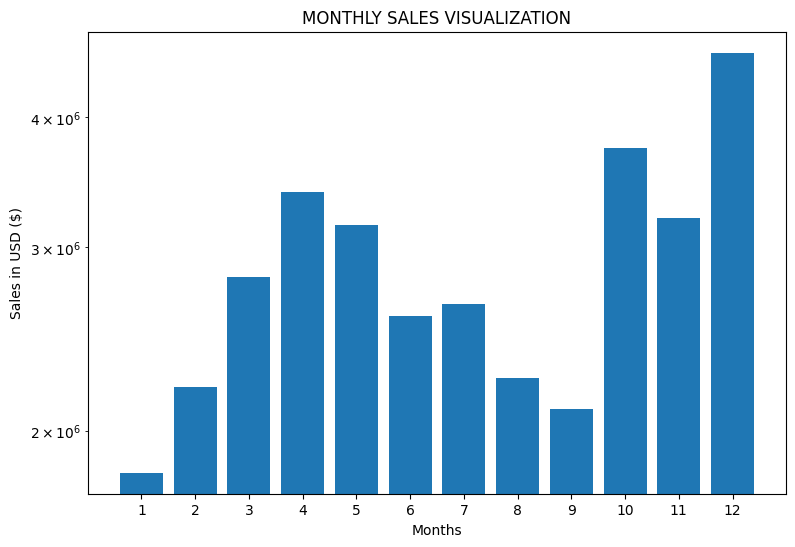

In [ ]:
# MONTHLY SALES VISUALIZATION
plt.figure(figsize=(9,6))
months = np.arange(1,13)

plt.bar(months,results['Sales'],log=True)
plt.title('MONTHLY SALES VISUALIZATION')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

In [ ]:
# WHICH CITY HAS THE MOST EARNING OR REVENUE
result = all_data.groupby('City').sum()

In [ ]:
result

,Quantity Ordered,Price Each,Month,Hours,Minutes,Sales
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,214264,442932,2795498.58
Austin (TX),11153,1809873.61,69829,141946,289060,1819581.75
Boston (MA),22528,3637409.77,141112,288225,590442,3661642.01
Dallas (TX),16730,2752627.82,104620,214390,435155,2767975.40
Los Angeles (CA),33289,5421435.23,208325,427444,866638,5452570.80
New York City (NY),27932,4635370.83,175741,357696,733598,4664317.43
Portland (ME),2750,447189.25,17144,35211,72856,449758.27
Portland (OR),11303,1860558.22,70621,144421,295533,1870732.34
San Francisco (CA),50239,8211461.74,315520,643265,1319477,8262203.91


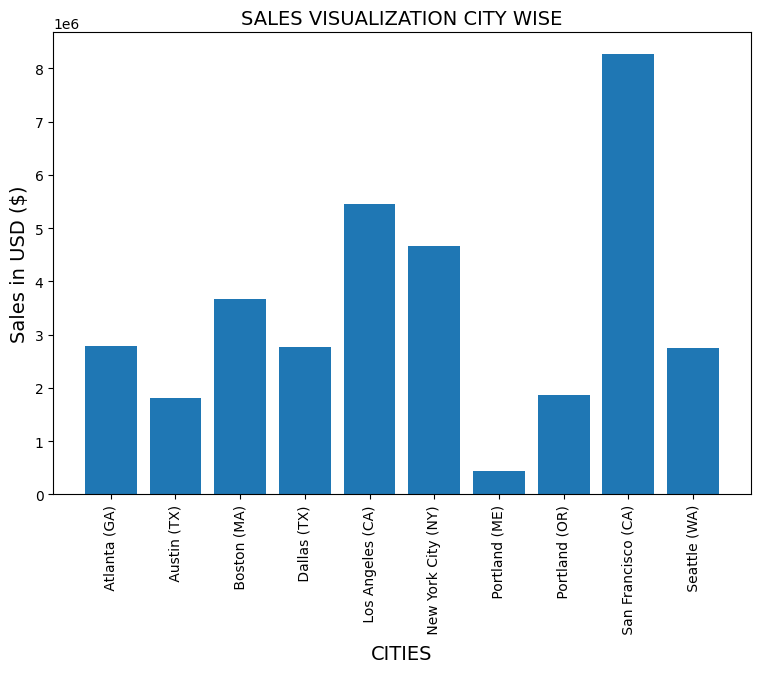

In [ ]:
# CITIES SALES VISUALIZATION
plt.figure(figsize=(9,6))
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,result['Sales'])
plt.title('SALES VISUALIZATION CITY WISE',size=14)
plt.xticks(cities,rotation='vertical')
plt.xlabel('CITIES',size=14)
plt.ylabel('Sales in USD ($)',size=14)
plt.show()

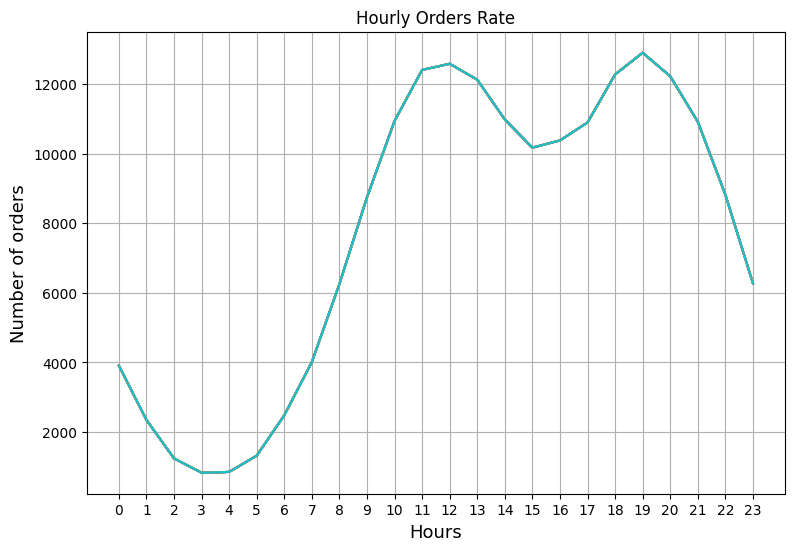

In [ ]:
# FINDING HOURLY PURCHASE USING LINE PLOT 
# RECOMMENDED TIME FOR SHOWING ADDS IS 11AM(11) OR 7PM(19) 
plt.figure(figsize=(9,6))
hours = [hour for hour,df in all_data.groupby(['Hours'])]
plt.plot(hours, all_data.groupby(['Hours']).count())
plt.xticks(hours)
plt.ylabel('Number of orders',size=13)
plt.xlabel('Hours',size=13)
plt.title('Hourly Orders Rate')
plt.grid()
plt.show()

In [ ]:
# FINDING DUPLICATES IN THE ORDER ID COLUMN
df = all_data[all_data['Order ID'].duplicated(keep=False)]
# CREATING A GROUPED COLUMN USING FEATURE ENGINEERING
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))
# REMOVING DUPLICATES FROM ORDER ID AND GROUPED COLUMN
df = df[['Order ID','Grouped']].drop_duplicates()
df



<ipython-input-37-644aee7c2d2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [ ]:
# FINDING THE 10 MOST ORDERED PAIRS OF PRODUCTS 
count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
# FINDING THE 10 MOST ORDERED TRIPLETS OF PRODUCTS 
count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,3)))

for key,value in count.most_common(10):
  print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [ ]:
# FINDING THE 10 MOST ORDERED QUADS OF PRODUCTS 
count = Counter()
for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,4)))

for key,value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


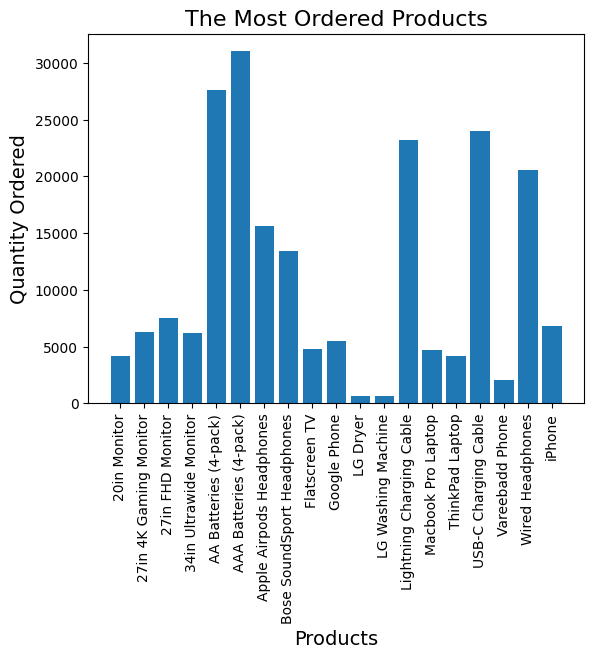

In [ ]:
# THE MOST ORDERED PRODUCTS
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product = [product for product,df in product_group]

plt.bar(product,quantity_ordered)
plt.xticks(product,rotation = 'vertical')
plt.xlabel('Products',size=14)
plt.ylabel('Quantity Ordered',size=14)
plt.title('The Most Ordered Products',size = 16)
plt.show()

In [ ]:
# PRICE OF EACH PRODUCT
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-77-d2982c256298>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation = 'vertical')


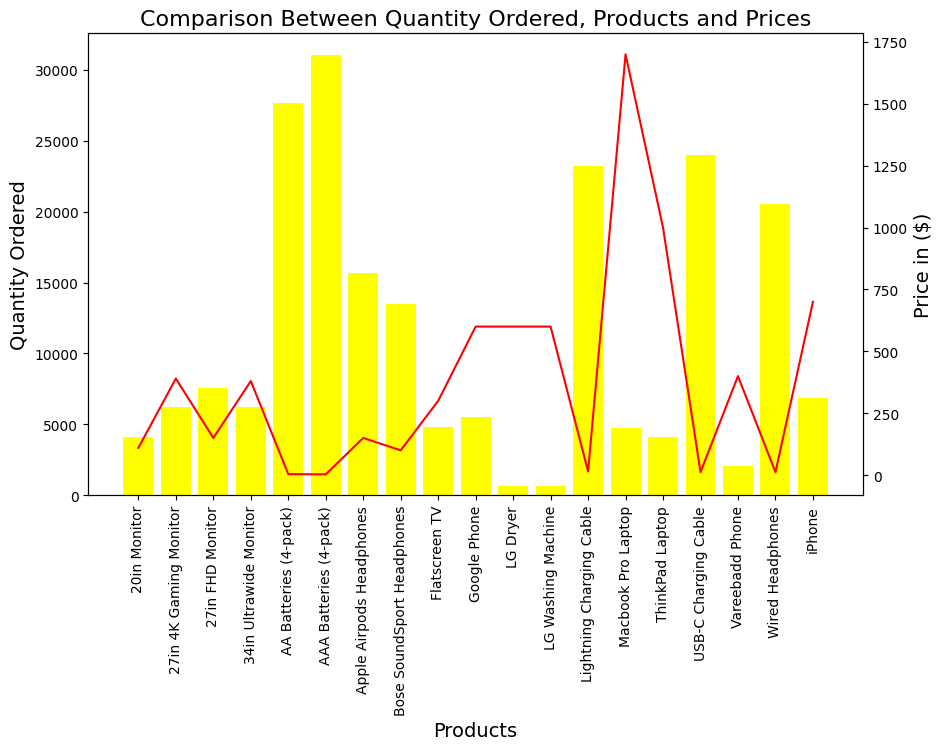

In [ ]:
# VISUALIZATION OF COMPARISON BETWEEN QUANTITY ORDERED, PRODUCTS AND PRICES
prices = all_data.groupby('Product').mean()['Price Each']
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product = [product for product,df in product_group]


fig,ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(product,quantity_ordered,color='yellow')
ax2.plot(product,prices,color='r')
ax1.set_xticklabels(product,rotation = 'vertical')
ax1.set_xlabel('Products',size=14)
ax1.set_ylabel('Quantity Ordered',size=14)
ax2.set_ylabel('Price in ($)',size=14)
ax1.set_title('Comparison Between Quantity Ordered, Products and Prices',size=16)
plt.show()

